# Neural Netwroks 
- 뇌를 본따 만든 수학적 모델 
- mapping이 학습이 되는 것이다. 
- Mapping from a vector to another vector (or a scalar value) 

>$y = f(\sum_iw_ix_i + \theta)$
- $w$가 매우 중요하다. 실상 dot product이며 w는 필터라고 해석을 할수 있다. 
- 또한 $f(x)$는 무조건 nonlinear한 함수가 들어가야한다. 
- $\theta$가 없으면 모두 원점을 지나게 된다. 

> 계층단위 구성 
1. $x$ : input layer (입력), 벡터이다. 
2. $o$ : ouput layet (출력)
3. $y$ : hidden layer (나머지 레이어들 전부)



- 각각의 레이어들은 인풋으로 제공되는 정보들을 조합해서 높은 수준의 정보를 생산해낸다. 
> 전달되는 정보의 조합은 요구되는 __feature__에 따라서 크기와 방향(w)를 설정해준다. 
- $|a||b|cos\theta$ : 입력하고 필터의 방향이 일치하면 값이 커짐 


- 학습 데이터들을 통해 확률 분포를 학습할 수 있음 : 패턴들의 성질을 확률적으로 이해하고 기억한다는 것. 
- 결국 이 분포에 입각해서 샘플링을 하게 되는데, 확률 분포가 높은 곳에서 샘플링이 주로 일어나게 된다.
> 이때 확률 분포를 통해서 여러가지 일들을 수행할 수 있다.
>1. 확률 분포 추정
>2. 새로운 샘플 생성
>3. 복원
>4. transform (변형, 완전 모방) : 어려움 



- 따라서 v to v mapping을 하거나 확률 분포를 통한 학습을 한다 

# Perceptron - single / multi 

###1. Preceptron 
- input signals $x_i$
- connection weights $w_i$
- Activation level $net$ = $\sum_iw_ix_i$ (called logit or net value)
- __nonlinear__ activation function $f(')$
> mapping from real value to a binary value (decision) 
if $net > \theta $, output = 1, otherwise = - 1 (hard-limiting function)


###2. activation function
- __non-linearity__ (hidden layer에서 매우 중요)
- restrict output in a __specific range__
- measurement -> probability or decision (Out layer에 해당)

1. Hard - limit 
>$f(x) = +1 (if \space  x > 0)  | -1 (otherwise)$

2. Sigmoid (미분가능)
>$f(x) = \frac{1}{1 + e^{-{\lambda}x}}$ 

3. ReLU (요즘 제일 많이 씀)
>$f(x) = max(x,0)$
> 구간이 미분 가능하면 ok (기울기 학습은 모든 구간이 미분가능이 요구되는것이 아니다)





###3. perceptron classifier 
1. decision rule
- if $o(x)$ < 0, X => class 1
- if $o(x)$ > 0, X => class 2 
- what's the meaning of equation $"o(x) = 0 "$? 직선의 방정식이기 때문에 boundary를 뜻한다. 



###3. Limitation of single-layer perception 
- XOR sample에 대해서 맵핑이 아에 안됨 

###4. Multi-layer perceptron 
- 해당 문제들이 결국 1차원 평면에서 구분이 되지 않기 때문에 레이어를 더 추가해서 $x_1, x_2, ... x_n$에 대해서 직접 output을 연결시키는 것이 아니고 레이어 $y_i$를 추가하여서 $y_{i1}, y_{i2}, ...$에 대한 output 출력을 찾아냄! 
- 또한 depth(layer)를 늘리지 않고 복잡한 것을 다룰려면 layer에 node가 매우매우 많이 증가 해야한다. 


###5. Regression & Classifier 
1. Classification 
>output layer $f(net_k) = \frac{exp(net_k)}{\sum_kexp(net_k)} $ 
- Train by cross entropy loss
>$ L_{CE} = -y_klog\hat{y_k}, \space where \space y_k \space \space {0,1}$


2. Regression with neural networks 
- No activation function for output layer ( 출력 범위를 제한하면 안됨 )
- Train by mean squared error (MSE) loos
> $L_{MSE} = \frac{1}{2K} \sum_k (\hat{y_k} - y)^2 $ 



In [3]:
! pip install mglearn

import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=7b722052a46bd4331762c504692205944776486d64b71bdd7ea9f96feb13b5bc
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
# Neural Networks in scikit learn
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier (random_state = 0 , hidden_layer_sizes=[100,])

from sklearn.neural_network import MLPRegressor

mlpR = MLPRegressor(activation = 'logistic', hidden_layer_sizes= (50, 50, 50), max_iter = 1000)

Text(0.5, 1.0, 'Activation Functions for Output Layers')

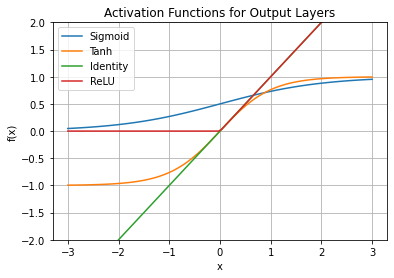

In [ ]:
# non-linearity functions (sigmoid, tanh, identity)
# note: softmax is hard to visualize

# x coordinates from -3 to 3
line = np.linspace(-3, 3, 100)
#print("line =\n", line)


# horizontal line
plt.grid()
plt.ylim(-2, 2)

# sigmoid (logistic)
plt.plot(line, [1/(1+np.exp(-x)) for x in line], label="Sigmoid")

# tanh
plt.plot(line, np.tanh(line), label="Tanh")

# identity
plt.plot(line, line, label="Identity")

# ReLU
plt.plot(line, np.maximum(line, 0), label="ReLU")

plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Activation Functions for Output Layers")

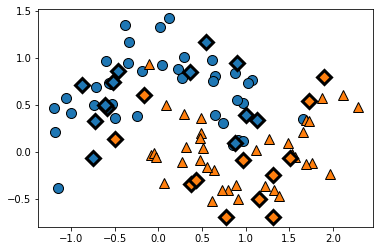

In [4]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state= 3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y , random_state = 42 )

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='D', markeredgewidth=3)

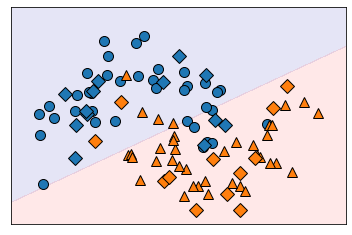

In [ ]:
from sklearn.linear_model import LogisticRegression
logi_reg = LogisticRegression().fit(X_train, y_train)

mglearn.plots.plot_2d_separator(logi_reg, X_train, fill=True, alpha=.1)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='D')

Training accuracy =  0.8666666666666667
Test Accuracy =  0.76


Text(0, 0.5, 'Feature 1')

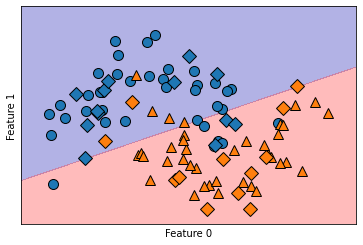

In [ ]:
# LinearSVM

from sklearn.svm import LinearSVC
linearSVC = LinearSVC().fit(X_train,y_train)

# check coefficients and intercept
#print("linearSVC.coef_: ", linearSVC.coef_)               # W
#print("linearSVC.intercept_:", linearSVC.intercept_)      # b

print("Training accuracy = ", linearSVC.score(X_train, y_train))
print("Test Accuracy = ", linearSVC.score(X_test, y_test))

mglearn.plots.plot_2d_separator(linearSVC, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='D')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

###선형모델로는 이런것들이 잘 학습이 안됨 ㅠㅠ 

Training accuracy =  0.92
Test Accuracy =  0.88


Text(0, 0.5, 'Feature 1')

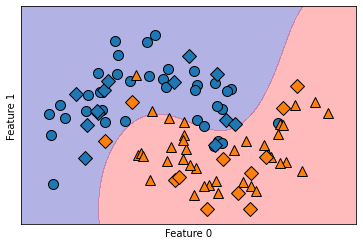

In [6]:
# SVM with RBF kernel

from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=100, gamma=1).fit(X_train,y_train)

print("Training accuracy = ", svc.score(X_train, y_train))
print("Test Accuracy = ", svc.score(X_test, y_test))

mglearn.plots.plot_2d_separator(svc, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='D')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Training accuracy =  0.9866666666666667
Test Accuracy =  0.88


Text(0, 0.5, 'Feature 1')

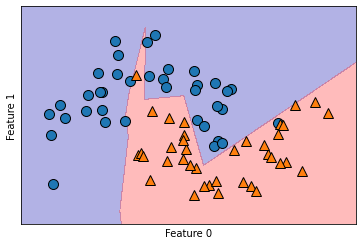

In [ ]:
# using 10 hidden units

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
#  hidden_layer_sizes : MLP Struture를 더 함
# 10개정도로 학습을 충분히 할 수 있는 데이터여서 성능의 차이가 안나타남. 
# 성능은 동일하지만 경계선 패턴이 매우 다름 
# 히든노드 하나는 직선을 하나 표함 37분 경 

mlp.fit(X_train, y_train)

print("Training accuracy = ", mlp.score(X_train, y_train))
print("Test Accuracy = ", mlp.score(X_test, y_test))

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Training accuracy =  0.9866666666666667
Test Accuracy =  0.84


Text(0, 0.5, 'Feature 1')

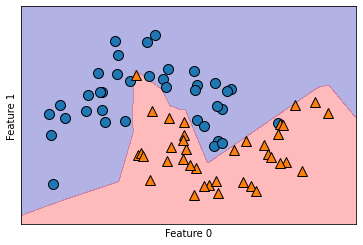

In [ ]:
# using two hidden layers, with 10 units each

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
# 히든 레이어 2개 

mlp.fit(X_train, y_train)

print("Training accuracy = ", mlp.score(X_train, y_train))
print("Test Accuracy = ", mlp.score(X_test, y_test))

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Preprocessing data for MLP (standardization, $x' = \frac{x-\mu}{\sigma}$)

In [ ]:
# load cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [ ]:
# 대조군
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: ", mlp.score(X_train, y_train))
print("Accuracy on test set: ", mlp.score(X_test, y_test))

Accuracy on training set:  0.9389671361502347
Accuracy on test set:  0.916083916083916


In [ ]:
# Normalizing data for MLP

# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
# axis =0 : 데이터에 대한 축, 데이터에 대한 평균을 만들어라아 
print("mean_on_train =", mean_on_train)
print("std_on_train =", std_on_train)

std_on_train[std_on_train == 0] = 1

#min max와, stanardaztion이 두가지 정도 널리 쓰이는데, neural network에는 stad를 씀
# min max는 53분 out lier 가 있으면 힘듬 

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_Mscaled = (X_train - mean_on_train) / std_on_train
X_test_Mscaled = (X_test - mean_on_train) / std_on_train


# print(X_train_scaled)
# print()
# print(X_test_scaled)

mean_on_train = [1.41591714e+01 1.92330047e+01 9.21438967e+01 6.58415023e+02
 9.63659859e-02 1.03669601e-01 8.86501308e-02 4.91440610e-02
 1.80473239e-01 6.26169953e-02 4.04795070e-01 1.21222723e+00
 2.84097934e+00 4.06956737e+01 6.98667371e-03 2.50779930e-02
 3.16993207e-02 1.17015352e-02 2.04367559e-02 3.71274953e-03
 1.63168169e+01 2.56379812e+01 1.07459131e+02 8.87647887e+02
 1.32503404e-01 2.52836338e-01 2.69481120e-01 1.15279345e-01
 2.89649296e-01 8.35402582e-02]
std_on_train = [3.54820940e+00 4.11777749e+00 2.44085763e+01 3.60001771e+02
 1.38386118e-02 5.06235856e-02 7.84252380e-02 3.87729435e-02
 2.76599707e-02 6.84425158e-03 2.86830175e-01 5.45592960e-01
 2.05927160e+00 4.84585335e+01 2.82332840e-03 1.69519540e-02
 3.14116890e-02 5.90579400e-03 8.19292513e-03 2.62721557e-03
 4.88905984e+00 6.05754894e+00 3.39251771e+01 5.85664376e+02
 2.29034367e-02 1.51720808e-01 1.98125175e-01 6.55415896e-02
 6.32173051e-02 1.77743394e-02]


In [ ]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler( ).fit(X_train)
X_train_Pscale = scaler.transform(X_train)

# scaler = StandardScaler().fit(X_test)
X_test_Pscale = scaler.transform(X_test)
# print(X_train_scale)
# print()
# print(X_test_scale)

Scale을 **X_train에다가만** 하는 이유 => test는 결국 validation을 위한 데이터이기 때문에 스케일하는 데에 영향을 주면 안된다. 

In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_Mscaled, y_train)

print("manual - Accuracy on training set: ", mlp.score(X_train_Mscaled, y_train))
print("manual - Accuracy on test set: ", mlp.score(X_test_Mscaled, y_test))

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_Pscale, y_train)

print("package - Accuracy on training set: ", mlp.score(X_train_Pscale, y_train))
print("package -  Accuracy on test set: ", mlp.score(X_test_Pscale, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


manual - Accuracy on training set:  0.9929577464788732
manual - Accuracy on test set:  0.965034965034965
package - Accuracy on training set:  0.9929577464788732
package -  Accuracy on test set:  0.965034965034965


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


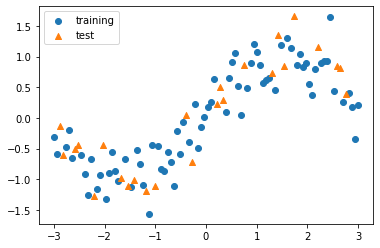

In [ ]:
# load data
#X, y = mglearn.datasets.make_wave()


# generate data along sine wave

# generate X coordinates

X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(loc=0, scale=0.3,size=len(X))
X = np.expand_dims(X, axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# plot data
plt.scatter(X_train, y_train, marker='o', label="training")
plt.scatter(X_test, y_test, marker='^', label="test")
plt.legend()


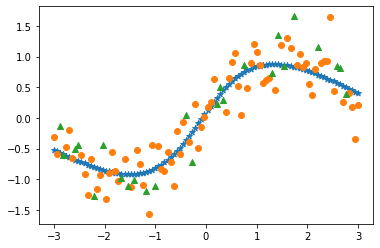

In [ ]:

from sklearn.neural_network import MLPRegressor
# Supported activations are ['identity', 'logistic', 'relu', 'softmax', 'tanh'].
mlpR = MLPRegressor(activation = 'tanh', 
                    hidden_layer_sizes = (100, 100),
                    max_iter = 1000000).fit(X_train,y_train)

line = np.linspace(-3, 3 , 100)
line = np.expand_dims(line, axis=1) 
line_MLPP = mlpR.predict(line)

plt.scatter(line, line_MLPP, marker='*')

plt.scatter(X_train, y_train, marker='o', label = 'training')
plt.scatter(X_test, y_test, marker='^', label = "test")
